# k-nearest neighbor (k-NN)

### Steps:

- einlesen der GeoJson-Datei & vorbereiten und anpassen
- Daten aufteilen in 80% Training und 20% Test
- k-Wert festlegen
- Modell erstellen und trainieren


In [3]:
import geopandas as gpd
import pandas as pd

# Pfad zur GeoJSON-Datei angeben
file_path = "../../data/processed_data/simra_osm_all.geojson"

# GeoJSON-Datei einlesen
gdf = gpd.read_file(file_path)


# GeoJSON-Datei laden 
# gdf = gpd.read_file('../../data/processed_data/simra_osm_all.geojson')

gdf.head()

,id,type,score,incidents,rides,index_right,maxspeed,asphalt,concrete,paving_stone,...,highway_rare,living_street,path,primary,residential,secondary,service,tertiary,track,geometry
0,[100049].0,Street,0.0,0,138,57832.0,50,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.750000,0.0,0.000000,0.0,"POLYGON ((13.45412 52.54035, 13.45320 52.53977..."
1,[100069498].0,Junction,0.0,0,200,123443.0,30,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,"POLYGON ((13.52273 52.50704, 13.52248 52.50690..."
2,"[100078509, 288268004, 3888645535].0",Junction,0.0,0,54,75145.0,50,0.846154,0.0,0.0,...,0.0,0.0,0.0,0.0,0.153846,0.461538,0.0,0.000000,0.0,"POLYGON ((13.47754 52.51457, 13.47782 52.51438..."
3,[100094].0,Street,0.0,0,98,6529.0,30,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,"POLYGON ((13.46855 52.61490, 13.46841 52.61475..."
4,[1000].0,Street,0.0,0,130,156528.0,50,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,0.0,"POLYGON ((13.35533 52.51693, 13.35655 52.51683..."


In [34]:
gdf.columns

Index(['id', 'type', 'score', 'incidents', 'rides', 'index_right', 'maxspeed',
       'asphalt', 'concrete', 'paving_stone', 'sett', 'unpaved', 'markers',
       'highway', 'cycleway', 'footway', 'highway_rare', 'living_street',
       'path', 'primary', 'residential', 'secondary', 'service', 'tertiary',
       'track', 'geometry'],
      dtype='object')

#### Entfernen nicht benötigter Spalten (Columns)

In [4]:
df = gdf.drop(columns=['id', 'index_right', 'geometry', 'markers', 'highway', 'incidents', 'rides'])

df.head()

,type,score,maxspeed,asphalt,concrete,paving_stone,sett,unpaved,cycleway,footway,highway_rare,living_street,path,primary,residential,secondary,service,tertiary,track
0,Street,0.0,50,0.000000,1.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.000000,0.750000,0.0,0.000000,0.0
1,Junction,0.0,30,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
2,Junction,0.0,50,0.846154,0.0,0.0,0.0,0.153846,0.384615,0.0,0.0,0.0,0.0,0.0,0.153846,0.461538,0.0,0.000000,0.0
3,Street,0.0,30,0.500000,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
4,Street,0.0,50,1.000000,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,0.0


#### 'type' (STREET und JUNCTION) in numerische Werte (boolsche Werte) umwandeln

In [27]:
df = pd.get_dummies(df, columns=['type'])

df.head()

KeyError: "None of [Index(['type'], dtype='object')] are in the [columns]"

#### Features und Label auswählen - Zielvariable festlegen

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Features und Label auswählen
# X = df[['rides', 'maxspeed', 'asphalt', 'concrete',
#       'paving_stone', 'sett', 'unpaved', 'cycleway', 'footway',
#      'highway_rare', 'living_street', 'path', 'primary', 'residential',
#       'secondary', 'service', 'tertiary', 'track', 'type_Junction',
#      'type_Street']]

# Zielvariable 
y = df['score']

# Alle anderen Spalten als Features verwenden 
X = df.drop(columns=['score'])

#### Aufteilen der Daten in Trainings- und Testdaten - Ausgabe der Verteilung

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Anzahl der Trainingsdaten: {X_train.shape[0]}")
print(f"Anzahl der Testdaten: {X_test.shape[0]}")


Anzahl der Trainingsdaten: 12529
Anzahl der Testdaten: 3133


#### Preprocessing: (Kategorische Variablen encodieren und) numerische Variablen skalieren

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['maxspeed', 'asphalt', 'concrete', 
                                   'paving_stone', 'sett', 'unpaved', 
                                   'cycleway', 'footway', 'highway_rare', 
                                   'living_street', 'path', 'primary', 
                                   'residential', 'secondary', 'service', 
                                   'tertiary', 'track', 'type_Junction', 
                                   'type_Street'])
    ])

#### Min-Max-Scaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['maxspeed', 'asphalt', 'concrete', 
                                 'paving_stone', 'sett', 'unpaved', 
                                 'cycleway', 'footway', 'highway_rare', 
                                 'living_street', 'path', 'primary', 
                                 'residential', 'secondary', 'service', 
                                 'tertiary', 'track', 'type_Junction', 
                                 'type_Street'])
    ])

#### k-NN Modell und Pipeline erstellen

In [13]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('knn', KNeighborsRegressor(n_neighbors=5))])

#### Modell trainieren

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['maxspeed', 'asphalt',
                                                   'concrete', 'paving_stone',
                                                   'sett', 'unpaved',
                                                   'cycleway', 'footway',
                                                   'highway_rare',
                                                   'living_street', 'path',
                                                   'primary', 'residential',
                                                   'secondary', 'service',
                                                   'tertiary', 'track',
                                                   'type_Junction',
                                                   'type_Street'])])),
                ('knn', KNeighborsRegressor())])

- **Pipeline und Preprocessing:**
Das Preprocessing in einer Pipeline ist sinnvoll, da es sicherstellt, dass dieselben Transformationen auf Trainings- und Testdaten angewendet werden.

Das Training ohne Pipeline ist möglich, aber fehleranfälliger und weniger flexibel.
Die Pipeline *erleichtert die Anwendung von Transformationen* und *verbessert die Lesbarkeit und Wiederverwendbarkeit des Codes*.

- **StandardScaler:**
Du musst nicht manuell Spalten auswählen. *StandardScaler* skaliert numerische Spalten automatisch.

#### Vorhersagen treffen

In [15]:
y_pred = pipeline.predict(X_test)

#### Modell evaluieren

In [16]:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0025


In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")

R² Score: -0.1388


In [18]:
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 0.0161




### Mean Squared Error

- Der **Mean Squared Error (MSE)** ist eine Maßzahl, die die durchschnittliche quadratische Abweichung der vorhergesagten Werte von den tatsächlichen Werten im Modell angibt.

- Ein niedriger Wert, wie **0.0025**, deutet darauf hin, dass dein Modell in der Lage ist, die tatsächlichen Werte relativ genau vorherzusagen. Das bedeutet, dass die Vorhersagen des Modells nahe bei den tatsächlichen Werten liegen.
- Dennoch ist es wichtig, diesen Wert im Kontext eines spezifischen Anwendungsfalls und der Skala des Zielwerts zu betrachten.

### R²

Ein negativer R²-Score ist ein starkes Signal dafür, dass das Modell nicht gut funktioniert. Es erfordert eine genauere Untersuchung der Daten, des Modells und der gewählten Features, um herauszufinden, warum das Modell die Varianz der Zielvariable nicht adäquat erklären kann.

Ein R²-Score von -0.1388 ist ein ungewöhnliches Ergebnis. 

#### Interpretation des R²-Scores:

- **R²-Wert** (auch als Bestimmtheitsmaß bekannt) misst, wie gut das Modell die Varianz der Zielvariablen erklärt. Ein R²-Wert von **1.0** bedeutet, dass das Modell alle Variationen perfekt erklärt, während ein R²-Wert von **0.0** bedeutet, dass das Modell überhaupt keine Erklärungskraft hat.
  
- **Negativer R²-Wert:** Wenn der R²-Wert negativ ist, bedeutet das, dass das *Modell schlechter abschneidet* als ein einfaches Mittelwertsmodell (das heißt, ein Modell, das immer nur den Durchschnittswert der Zielvariablen vorhersagt).

#### Warum kann der R²-Wert negativ sein?
- **Schlechtes Modell:** Das Modell könnte schlecht sein, weil es nicht in der Lage ist, die Muster in den Daten zu erfassen.

- **Überanpassung/Underfitting:** Das Modell könnte zu stark an das Rauschen der Trainingsdaten angepasst sein (Overfitting) oder es erfasst die grundlegenden Zusammenhänge nicht gut genug (Underfitting).

- **Falsche Feature-Auswahl:** Es kann sein, dass die ausgewählten Features nicht aussagekräftig sind oder wichtige Features fehlen.

#### Was kann man tun?

- **Daten und Modell prüfen:** Überprüfung der Daten auf Anomalien oder Fehler. Wurden alle relevanten Features verwendet oder verwässern unnötige Features das Modell.

- **Modell ändern:** Ein Modell wählen, das besser für die Daten geeignet ist, wie z.B. ein Random Forest oder ein Gradient Boosting Modell.

- **Cross-Validation:** Überprüfen der Modellleistung mit Cross-Validation, um sicherzustellen, dass der negative R²-Wert nicht zufällig ist.

- **Hyperparameter-Tuning:** Optimierung der Hyperparameter des verwendeten Modells, um die Anpassung zu verbessern.


## CrossValidation (CV)

Technik, um die Leistung eines Modells zu bewerten und sicherzustellen, dass es nicht übermäßig auf die Trainingsdaten zugeschnitten ist (Overfitting). Durch CV wird das Modell auf verschiedenen Teilen des Datensatzes trainiert und getestet, um eine stabilere Schätzung der Modellgüte zu erhalten.

- Datensatz wird in *k* gleich große Teile (Folds) aufgeteilt. (Hier cv=5 Folds)
- Das Modell wird *k-mal trainiert*, wobei jedes Mal ein anderer Fold als Testdatensatz und die restlichen k-1 Folds als Trainingsdaten verwendet werden.
- Die Leistung wird über alle *k* Läufe gemittelt.

Dient zur *bessere Schätzung der Modellleistung*, *Effektiverer Einsatz der Daten* und ermöglicht *Erkennung von Overfitting*.

In [19]:
from sklearn.model_selection import cross_val_score

# Daten skalieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# k-NN Modell initialisieren
knn = KNeighborsRegressor(n_neighbors=5)

# Cross-Validation mit 5 Folds
cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Negative MSE in positive Werte umwandeln
mse_scores = -cv_scores

print(f"Cross-Validation MSE Scores: {mse_scores}")
print(f"Durchschnittlicher MSE: {mse_scores.mean():.4f}")
print(f"Standardabweichung des MSE: {mse_scores.std():.4f}")

Cross-Validation MSE Scores: [0.00289772 0.00107375 0.00094041 0.00403509 0.00170466]
Durchschnittlicher MSE: 0.0021
Standardabweichung des MSE: 0.0012


### Cross-Validation MSE Scores

**[0.00172228, 0.00090331, 0.000686, 0.00278785, 0.00110318]**

- das Modell hat auf jedem der 5 verschiedenen Testdatensätze (Folds) unterschiedliche Fehlerwerte. Die Werte sind relativ niedrig, was darauf hinweist, dass das Modell generell gut performt. Allerdings gibt es einige Schwankungen, insbesondere einen relativ hohen MSE (0.00278785) im vierten Fold.

  
#### Durchschnittlicher MSE: (Mittelwert der MSE-Werte aus allen Folds)

Durchschnittlicher MSE **0.0014**: Zeigt eine gute Modellleistung im Durchschnitt.



#### Standardabweichung des MSE:

Standardabweichung des MSE **0.0008**: Zeigt eine gewisse Variabilität in der Modellleistung über die verschiedenen Folds hinweg, ist aber insgesamt relativ stabil.

## Visus

#### Boxplot der MSE-Werte:

Ein Boxplot kann die Verteilung der MSE-Werte über die verschiedenen Folds hinweg zeigen. 
Gibt es Ausreißer und wie eng liegen die MSE-Werte beieinander.

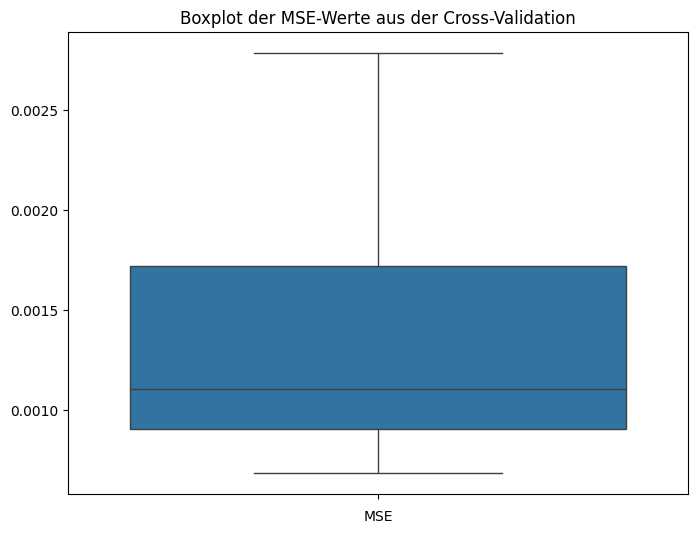

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# MSE-Werte aus der Cross-Validation
mse_scores = [0.00172228, 0.00090331, 0.000686, 0.00278785, 0.00110318]

plt.figure(figsize=(8, 6))
sns.boxplot(mse_scores)
plt.title('Boxplot der MSE-Werte aus der Cross-Validation')
plt.xlabel('MSE')
plt.show()

#### Histogramm der MSE-Werte:

Ein Histogramm zeigt die Häufigkeitsverteilung der MSE-Werte. Dies ist nützlich, um zu sehen, ob die Fehler gleichmäßig verteilt sind oder ob es eine Häufung in einem bestimmten Bereich gibt.

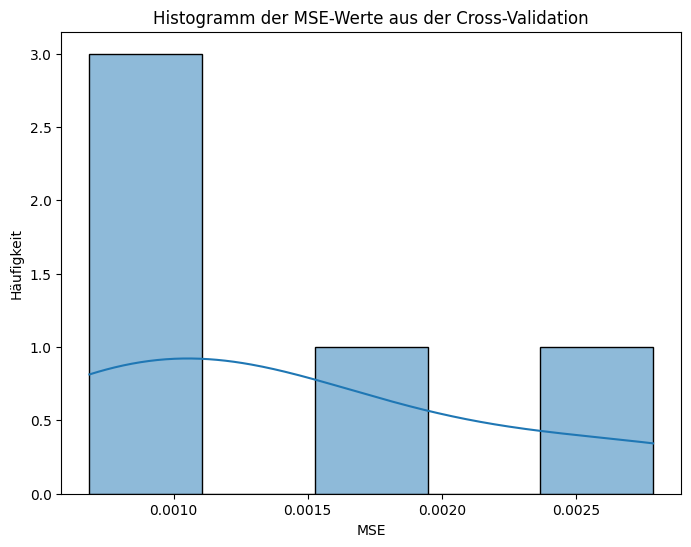

In [21]:


plt.figure(figsize=(8, 6))
sns.histplot(mse_scores, bins=5, kde=True)
plt.title('Histogramm der MSE-Werte aus der Cross-Validation')
plt.xlabel('MSE')
plt.ylabel('Häufigkeit')
plt.show()

#### Barplot der MSE-Werte:

Ein Barplot zeigt die MSE-Werte für jeden Fold separat. Dies kann nützlich sein, um die Performance in jedem Fold direkt zu vergleichen.

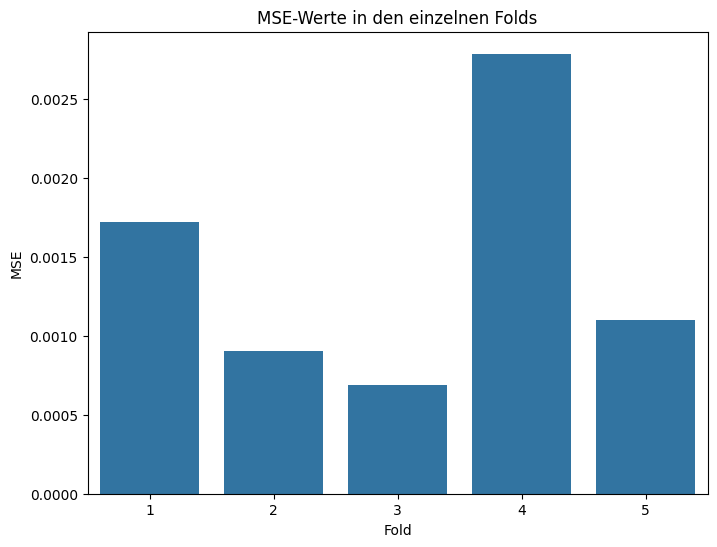

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, len(mse_scores) + 1)), y=mse_scores)
plt.title('MSE-Werte in den einzelnen Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()

### WEITER ANSCHAUEN

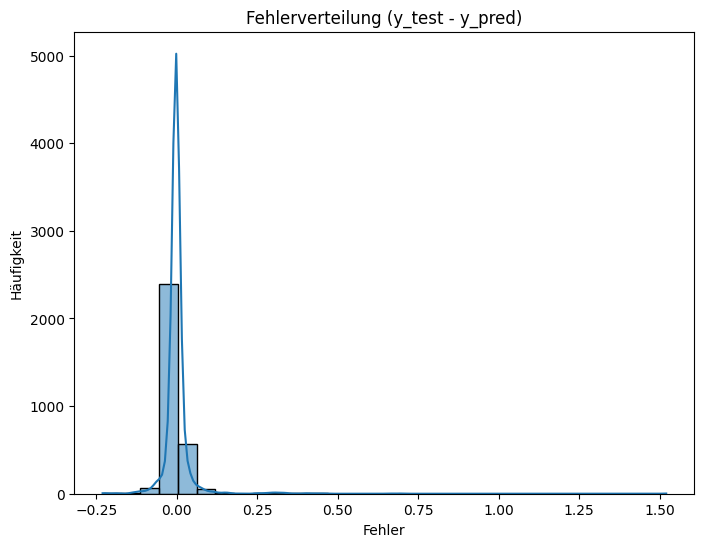

In [23]:


# Fehlerverteilung
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.title('Fehlerverteilung (y_test - y_pred)')
plt.xlabel('Fehler')
plt.ylabel('Häufigkeit')
plt.show()


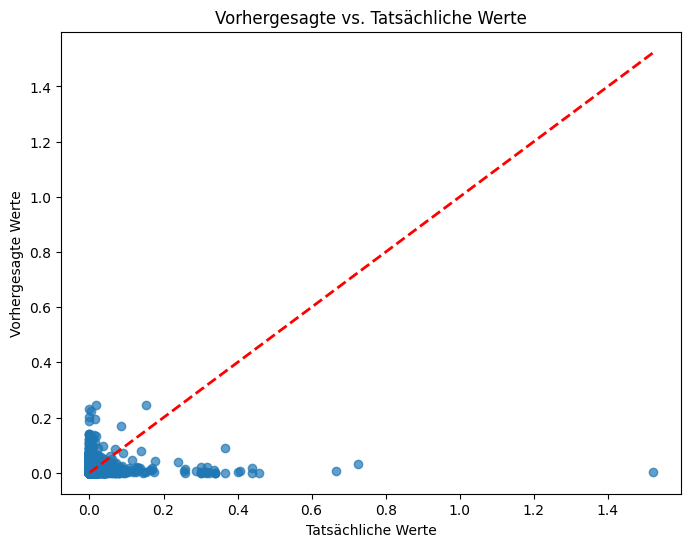

In [24]:
# Vorhergesagte vs. Tatsächliche Werte
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Vorhergesagte vs. Tatsächliche Werte')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.show()